In [8]:
import oracledb
import pandas as pd


connect_string = "localhost:1521/XE"

username = "system"
password = "123"

try:
    # Tenta estabelecer a conexão
    conn = oracledb.connect(user=username, password=password, dsn=connect_string)
    cursor = conn.cursor()

    query = "SELECT * FROM DADOS_RISCO_CREDITO"
    cursor.execute(query)
    
    column_names = [col[0] for col in cursor.description]
    rows = cursor.fetchall()
    
     #  DATAFRAME `df` É CRIADO
    df = pd.DataFrame(rows, columns=column_names)
    print("Dados carregados para o DataFrame Pandas.")   

except oracledb.Error as e:
    error_obj, = e.args
    print(f"Erro ao conectar ou executar query: {error_obj.message}")
finally:
    if 'cursor' in locals() and cursor:
        cursor.close()
    if 'conn' in locals() and conn:
        conn.close()
    print("Conexão com Oracle fechada.")    

Dados carregados para o DataFrame Pandas.
Conexão com Oracle fechada.


In [3]:
print("\n--- Primeiras 5 linhas do DataFrame (df.head()) ---")
print(df.head())



--- Primeiras 5 linhas do DataFrame (df.head()) ---
   ID_CLIENTE  IDADE  SALARIO_MENSAL  ANOS_EMPREGADO  DIVIDA_TOTAL  \
0           1     58         3765.82              23      12275.31   
1           2     48         2482.32              12      13803.86   
2           3     34         7377.60              11      18322.20   
3           4     62         4917.38              29      17809.53   
4           5     27         5347.93              25       7026.97   

   NUMERO_CONTAS_BANCO HISTORICO_PAGAMENTO STATUS_EMPREGO  \
0                    2                 BOM      EMPREGADO   
1                    2             REGULAR      EMPREGADO   
2                    4                 BOM      EMPREGADO   
3                    4                RUIM      EMPREGADO   
4                    1                 BOM      EMPREGADO   

   SCORE_CREDITO_EXTERNO  INADIMPLENTE  
0                    592             1  
1                    306             1  
2                    391            

In [6]:
 print("\n--- Informações do DataFrame (df.info()) ---")
 df.info()


--- Informações do DataFrame (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_CLIENTE             1000 non-null   int64  
 1   IDADE                  1000 non-null   int64  
 2   SALARIO_MENSAL         1000 non-null   float64
 3   ANOS_EMPREGADO         1000 non-null   int64  
 4   DIVIDA_TOTAL           1000 non-null   float64
 5   NUMERO_CONTAS_BANCO    1000 non-null   int64  
 6   HISTORICO_PAGAMENTO    1000 non-null   object 
 7   STATUS_EMPREGO         1000 non-null   object 
 8   SCORE_CREDITO_EXTERNO  1000 non-null   int64  
 9   INADIMPLENTE           1000 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 78.3+ KB


In [7]:
 print("\n--- Estatísticas Descritivas (df.describe()) ---")
 print(df.describe())


--- Estatísticas Descritivas (df.describe()) ---
        ID_CLIENTE        IDADE  SALARIO_MENSAL  ANOS_EMPREGADO  DIVIDA_TOTAL  \
count  1000.000000  1000.000000     1000.000000     1000.000000   1000.000000   
mean    500.500000    44.830000     5177.298230       14.694000  10483.805920   
std     288.819436    14.346809     2061.124183        8.749109   5030.789123   
min       1.000000    20.000000     1000.000000        0.000000      0.000000   
25%     250.750000    33.000000     3788.742500        7.000000   7097.410000   
50%     500.500000    45.000000     5158.070000       15.000000  10602.740000   
75%     750.250000    56.000000     6556.300000       22.000000  13692.755000   
max    1000.000000    69.000000    11334.740000       29.000000  26302.460000   

       NUMERO_CONTAS_BANCO  SCORE_CREDITO_EXTERNO  INADIMPLENTE  
count          1000.000000            1000.000000   1000.000000  
mean              2.561000             570.521000      0.629000  
std               1.11

## Análise Inicial do DataFrame

Ao observar as primeiras linhas e o `df.info()`, podemos confirmar que:
- O DataFrame possui 1000 registros e 10 colunas.
- Não há valores nulos em nenhuma coluna (`Non-Null Count` é 1000 para todas).
- Os tipos de dados (`Dtype`) parecem corretos: `int64` para inteiros, `float64` para decimais, e `object` para texto.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


--- Distribuição do Histórico de Pagamento ---
HISTORICO_PAGAMENTO
BOM        609
REGULAR    305
RUIM        86
Name: count, dtype: int64
HISTORICO_PAGAMENTO
BOM        60.9
REGULAR    30.5
RUIM        8.6
Name: proportion, dtype: float64


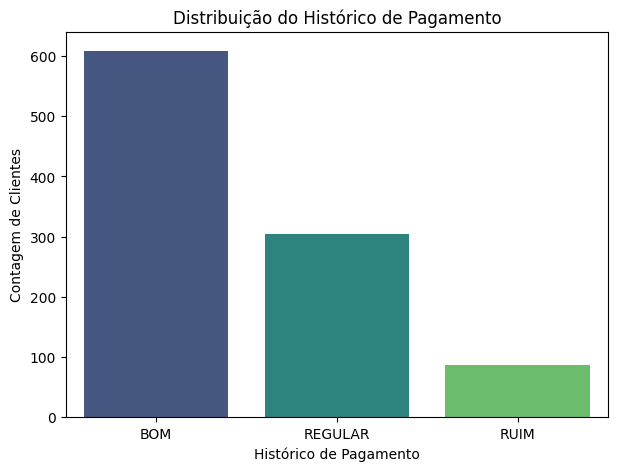

In [13]:
print("\n--- Distribuição do Histórico de Pagamento ---")
print(df['HISTORICO_PAGAMENTO'].value_counts())
print(df['HISTORICO_PAGAMENTO'].value_counts(normalize=True) * 100)

plt.figure(figsize=(7, 5))
sns.countplot(x='HISTORICO_PAGAMENTO', data=df, palette='viridis',hue='HISTORICO_PAGAMENTO', legend=False)
plt.title('Distribuição do Histórico de Pagamento')
plt.xlabel('Histórico de Pagamento')
plt.ylabel('Contagem de Clientes')
plt.show()



Aqui podemos ver a distribuição no histórico de pagamentos dos clientes classificados em: Bom, Regular e Ruim. Com isso podemos perceber que o percentual de ruins pagadores esta abaixo de 10%


--- Distribuição da Variável Alvo: INADIMPLENTE ---
INADIMPLENTE
1    629
0    371
Name: count, dtype: int64
INADIMPLENTE
1    62.9
0    37.1
Name: proportion, dtype: float64


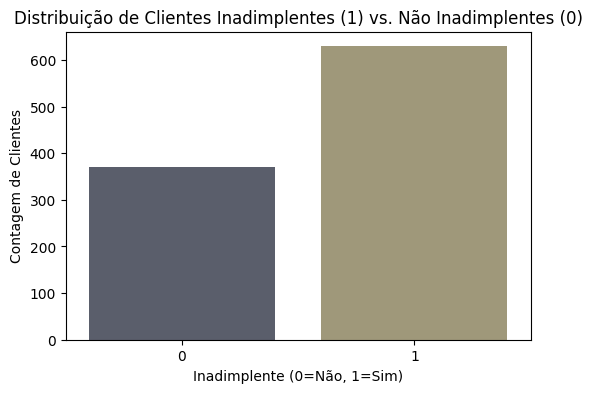

In [23]:
print("\n--- Distribuição da Variável Alvo: INADIMPLENTE ---")
print(df['INADIMPLENTE'].value_counts())
print(df['INADIMPLENTE'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='INADIMPLENTE', data=df, palette='cividis',hue='INADIMPLENTE', legend=False)
plt.title('Distribuição de Clientes Inadimplentes (1) vs. Não Inadimplentes (0)')
plt.xlabel('Inadimplente (0=Não, 1=Sim)')
plt.ylabel('Contagem de Clientes')
plt.show()

Aqui notamos a quantidade de clientes da base de dados que estão inadimplentes.


--- Distribuição do Status de Emprego ---
STATUS_EMPREGO
EMPREGADO       707
AUTONOMO        138
APOSENTADO      108
DESEMPREGADO     47
Name: count, dtype: int64
STATUS_EMPREGO
EMPREGADO       70.7
AUTONOMO        13.8
APOSENTADO      10.8
DESEMPREGADO     4.7
Name: proportion, dtype: float64


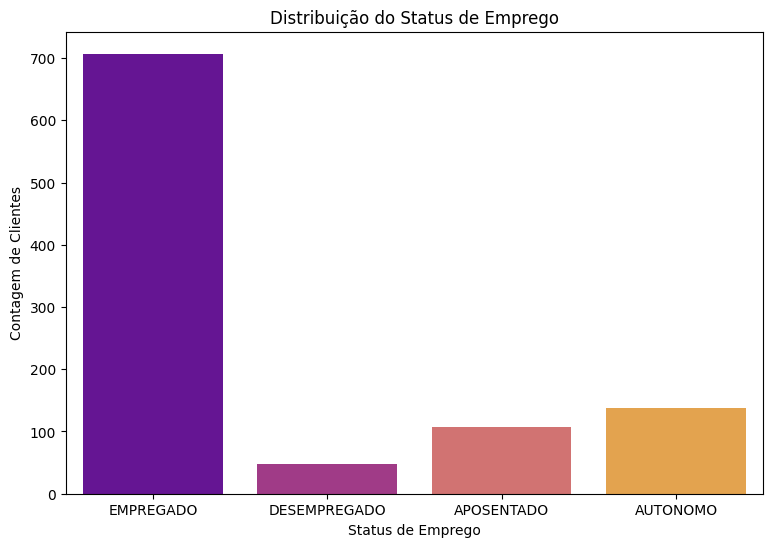

In [14]:
print("\n--- Distribuição do Status de Emprego ---")
print(df['STATUS_EMPREGO'].value_counts())
print(df['STATUS_EMPREGO'].value_counts(normalize=True) * 100)

plt.figure(figsize=(9, 6))
sns.countplot(x='STATUS_EMPREGO', data=df, palette='plasma',hue='STATUS_EMPREGO', legend=False)
plt.title('Distribuição do Status de Emprego')
plt.xlabel('Status de Emprego')
plt.ylabel('Contagem de Clientes')
plt.show()



Aqui podemos acompanhar a quantidade de clientes inadimplentes que compoem a base de dados


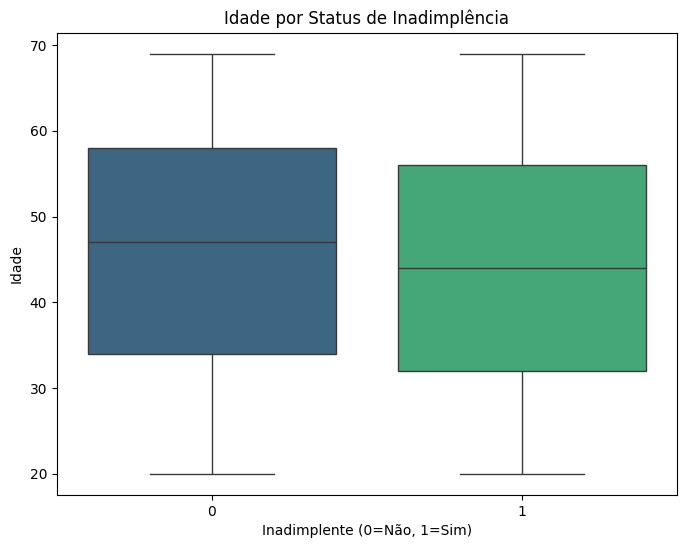

In [16]:
# Idade vs Inadimplência
plt.figure(figsize=(8, 6))
sns.boxplot(x='INADIMPLENTE', y='IDADE', data=df, palette='viridis',hue='INADIMPLENTE', legend=False)
plt.title('Idade por Status de Inadimplência')
plt.xlabel('Inadimplente (0=Não, 1=Sim)')
plt.ylabel('Idade')
plt.show()

Aqui podemos notar no grafico qual a faixa de idade que são inadimplentes dentro dessa base de dados.
    

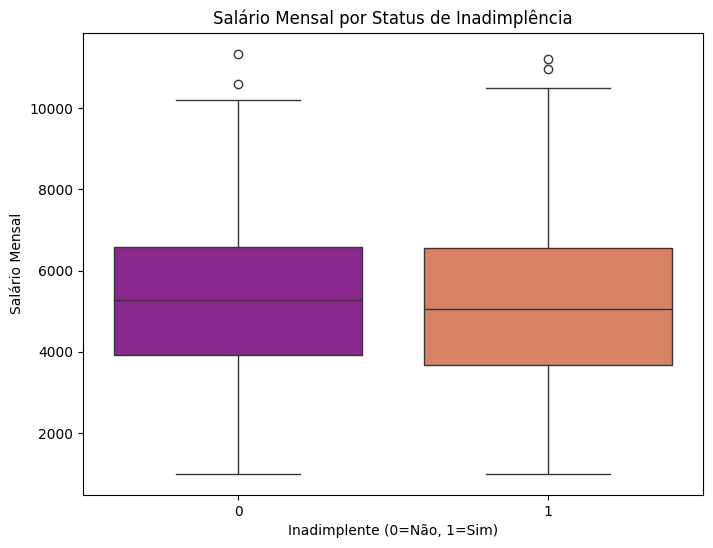

In [17]:
# Salário Mensal vs Inadimplência
plt.figure(figsize=(8, 6))
sns.boxplot(x='INADIMPLENTE', y='SALARIO_MENSAL', data=df, palette='plasma',hue='INADIMPLENTE', legend=False)
plt.title('Salário Mensal por Status de Inadimplência')
plt.xlabel('Inadimplente (0=Não, 1=Sim)')
plt.ylabel('Salário Mensal')
plt.show()

A media salarial do perfil inadimplente se concentra em uma faixa salarial mais baixa dos clientes que não são inadimplentes.

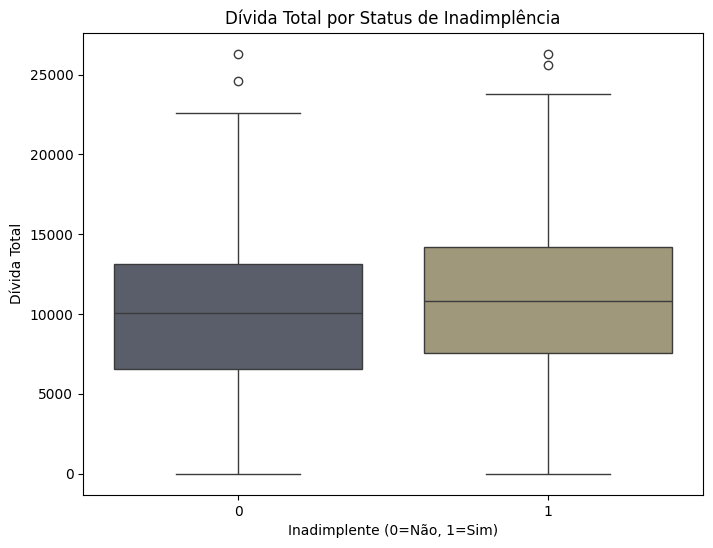

In [19]:
# Dívida Total vs Inadimplência
plt.figure(figsize=(8, 6))
sns.boxplot(x='INADIMPLENTE', y='DIVIDA_TOTAL', data=df, palette='cividis', hue='INADIMPLENTE', legend=False)
plt.title('Dívida Total por Status de Inadimplência')
plt.xlabel('Inadimplente (0=Não, 1=Sim)')
plt.ylabel('Dívida Total')
plt.show()

Aqui o gráfico demonstra que quanto maior a divida total, tem relação direta com a inadimplência do cliente.
    

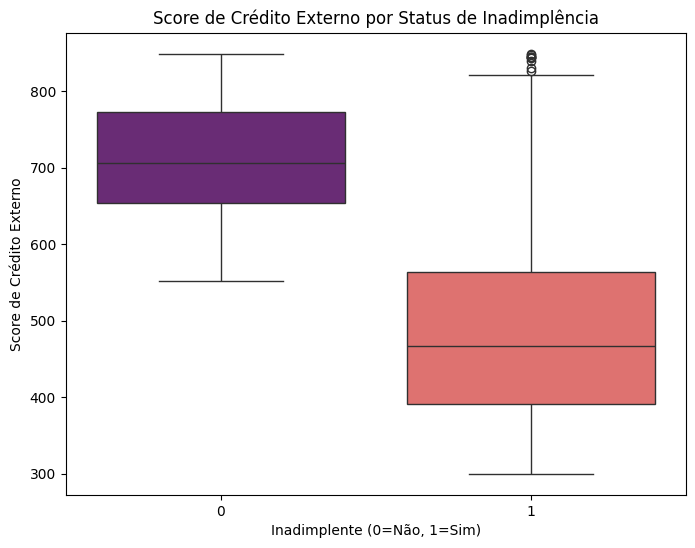

In [20]:
# Score de Crédito Externo vs Inadimplência
plt.figure(figsize=(8, 6))
sns.boxplot(x='INADIMPLENTE', y='SCORE_CREDITO_EXTERNO', data=df, palette='magma', hue='INADIMPLENTE' , legend=False)
plt.title('Score de Crédito Externo por Status de Inadimplência')
plt.xlabel('Inadimplente (0=Não, 1=Sim)')
plt.ylabel('Score de Crédito Externo')
plt.show()

A relação direta do score de credito influência os perfis de inadimplentes e não inadimplentes.


--- Proporção de Inadimplência por Histórico de Pagamento (%) ---
INADIMPLENTE                 0           1
HISTORICO_PAGAMENTO                       
BOM                  39.901478   60.098522
REGULAR              41.967213   58.032787
RUIM                  0.000000  100.000000


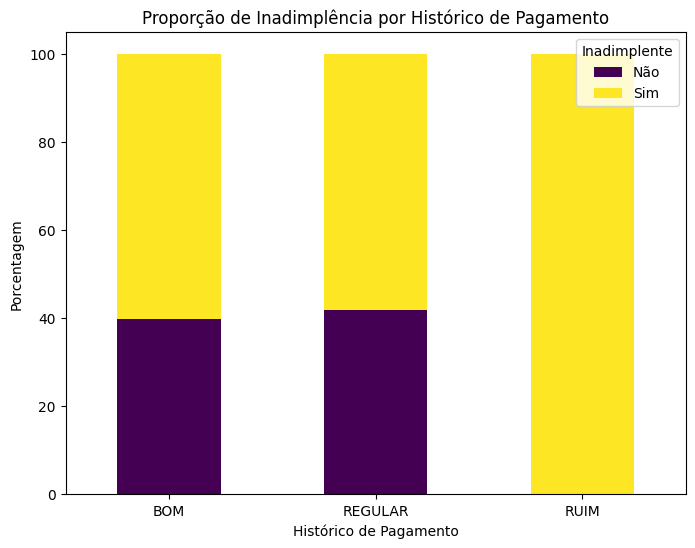

In [21]:
# --- HISTORICO_PAGAMENTO vs Inadimplência ---
# Criando uma tabela de contingência para proporções
tabela_contingencia = pd.crosstab(df['HISTORICO_PAGAMENTO'], df['INADIMPLENTE'], normalize='index') * 100
print("\n--- Proporção de Inadimplência por Histórico de Pagamento (%) ---")
print(tabela_contingencia)

tabela_contingencia.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Proporção de Inadimplência por Histórico de Pagamento')
plt.xlabel('Histórico de Pagamento')
plt.ylabel('Porcentagem')
plt.xticks(rotation=0)
plt.legend(title='Inadimplente', labels=['Não', 'Sim'])
plt.show()

Aqui no grafico vem que a probabilidade de inadimplência do cliente está relacionada ao historico de pagamento, sendo os clientes com um historico de mal pagamento muito alto, a probabilidade dele ser inadimplente e muito alta em comparação aos outros perfis

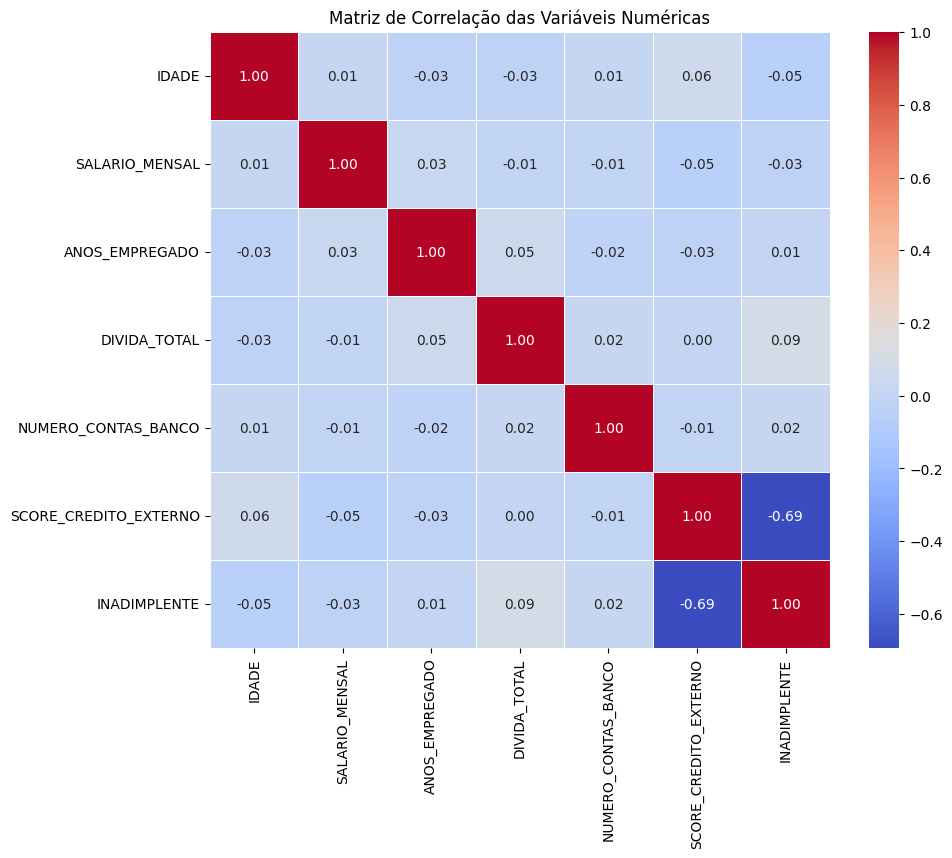

In [22]:
# Selecionar apenas as colunas numéricas para a matriz de correlação
df_numerico = df[['IDADE', 'SALARIO_MENSAL', 'ANOS_EMPREGADO', 'DIVIDA_TOTAL', 'NUMERO_CONTAS_BANCO', 'SCORE_CREDITO_EXTERNO', 'INADIMPLENTE']]

# Calcular a matriz de correlação
matriz_correlacao = df_numerico.corr()

# Criar o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

E neste ultimo grafico acompanhamos a correlação das informações existentes no banco, mostrando que a maior relação direta na analise de risco dos creditos, fica na relação do score de cretido com a inadimplência.